In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

from sklearn.preprocessing import OneHotEncoder

In [2]:
class neuron():
    def __init__(self,bias):
        self.bias=bias
        self.weights=[]

    # def sigmoid(self,x):
    #     return 1/(1+np.exp(-x))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -100, 100)))  # Clipping inputs to avoid large values

    
    def sum_input_to_hiddedn(self):
        sum=0
        for i in range(len(self.input)):
            sum += self.input[i]*self.weights[i]
            # print(sum)
        return sum+self.bias
    
    

    def cost(self,input):
        self.input=input
        self.output=self.sigmoid(self.sum_input_to_hiddedn())
        # print(self.output)
        return self.output
    
    def cal_error(self,target_op):
        return 0.5*np.square(target_op-self.output)
    
    def error_wrt_output(self, targer_op):
        return -(targer_op-self.output)


    def error_wrt_input(self):
        return self.output*(1-self.output)

    def total_error(self,targer_op):
        return self.error_wrt_input()*self.error_wrt_output(targer_op)
    

    # def error_wrt_weight(self,index):
    #     return self.input[index]

    

In [3]:
class network():
    def __init__(self,hidden_layer,bias):
        self.network=[]
        self.bias = bias if bias is not None else random.random()
        for _ in range(hidden_layer):
            self.network.append(neuron(self.bias))

    def forward(self,input):
        outputs=[]
        for i in self.network:
            outputs.append(i.cost(input))
        return outputs
    

    # def backPropogation(self,):
        

In [4]:
class all_network():
    def __init__(self,n_input_layer,n_hidden_layer,n_output_layer,hidden_weights,output_weights,hidden_bias,output_bias):
        self.hidden_l_network=network(n_hidden_layer,hidden_bias)
        self.output_l_network=network(n_output_layer,output_bias)
        self.n_input_layer=n_input_layer
        # self.hidden_weight_layer=self.add_weights_to_hidden(hidden_weights)
        # self.output_weight_layer=self.add_weights_to_output(output_weights)
        self.add_weights(self.hidden_l_network,hidden_weights,n_input_layer)
        self.add_weights(self.output_l_network,output_weights,n_hidden_layer)


    def add_weights(self, layer, weights, num_inputs):
        count = 0
        for neuron in layer.network:
            neuron.weights = weights[count:count + num_inputs]
            count += num_inputs
    # def add_weights_to_output(self,output_weights):
    #     count=0
    #     for i in range(len(self.output_l_network.network)):
    #         # print(hidden_l_network.network[i].weight)
    #         for j in range((self.n_input_layer)):
    #             self.output_l_network.network[i].weight.append(output_weights[count])
    #             count+=1

    def forward_hidden_op(self,input_data):
        # hidden_op=self.hidden_l_network.forward(input_data)
        # self.hidden_l_cost=self.hidden_l_network.forward(input_data)
        # print("Hidden layer outputs:", self.hidden_l_cost)
        # self.output_l_cost=self.output_l_network.forward(self.hidden_l_cost)
        # print("Output layer outputs:", self.output_l_cost)  # Print output layer outputs
        hidden_output = self.hidden_l_network.forward(input_data)
        # print(f"Hidden Layer Output: {hidden_output}")
        output = self.output_l_network.forward(hidden_output)
        # print(f"Output Layer Output: {output}")

        # return np.mean(output)
        return output
    
    def backPropogation(self, input_data, target_op,learning_rate=0.5):
        # Output layer deltas
        # self.forward_hidden_op(target_inp)
        hidden_output = self.hidden_l_network.forward(input_data)
        final_output = self.output_l_network.forward(hidden_output)

        # output_deltas = [0] * len(self.output_l_network.network)
        # for i in range(len(self.output_l_network.network)):
        #     output_deltas[i] = self.output_l_network.network[i].cal_error(target_op[i])

        # output_deltas = []
        output_deltas = [
            (target - output) * neuron.error_wrt_input()
            for target, output, neuron in zip(target_op, final_output, self.output_l_network.network)
        ]
        # hidden_deltas=[]
        
        # Hidden layer deltas
        hidden_deltas = []
        for i, hidden_neuron in enumerate(self.hidden_l_network.network):
            weighted_sum = sum(
                delta * output_neuron.weights[i]
                for delta, output_neuron in zip(output_deltas, self.output_l_network.network)
            )
            hidden_deltas.append(weighted_sum * hidden_neuron.error_wrt_input())

        # Update output layer weights and biases
        for neuron, delta in zip(self.output_l_network.network, output_deltas):
            neuron.weights = [
                weight + learning_rate * delta * hidden_output[i]
                for i, weight in enumerate(neuron.weights)
            ]
            neuron.bias += learning_rate * delta

        # Update hidden layer weights and biases
        for neuron, delta in zip(self.hidden_l_network.network, hidden_deltas):
            neuron.weights = [
                weight + learning_rate * delta * input_data[i]
                for i, weight in enumerate(neuron.weights)
            ]
            neuron.bias += learning_rate * delta



    def calculate_total_error(self, dataset):
        total_error = 0
        for input_data, target_op in dataset:
            outputs = self.forward_hidden_op(input_data)
            total_error += sum(0.5 * (target_op[i] - outputs[i]) ** 2 for i in range(len(target_op)))
        return total_error






In [5]:
nn = all_network(2, 2, 2, hidden_weights=[0.15, 0.2, 0.25, 0.3], hidden_bias=0.35, output_weights=[0.4, 0.45, 0.5, 0.55], output_bias=0.6)
a=nn.forward_hidden_op([0.05, 0.1])
exp_logits = np.exp(a - np.max(a))  # Normalize for numerical stability
probabilities = exp_logits / np.sum(exp_logits)
print("Class probabilities:", probabilities)


Class probabilities: [0.49460936 0.50539064]


In [6]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_1 = X_train
y_train_1 = y_train
X_test_1 = X_test
y_test_1 = y_test
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:10000]
y_test = y_test[:10000]

# print(X_train_1.shape)
# print(y_train_1.shape)
# print(X_test_1.shape)
# print(y_test_1.shape)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

input_size = 784
hidden_layer_size = 64
output_layer_size = 10

hidden_weights = np.random.rand(hidden_layer_size * input_size) * 0.1
output_weights = np.random.rand(output_layer_size * hidden_layer_size) * 0.1
hidden_bias = 0.1
output_bias = 0.1


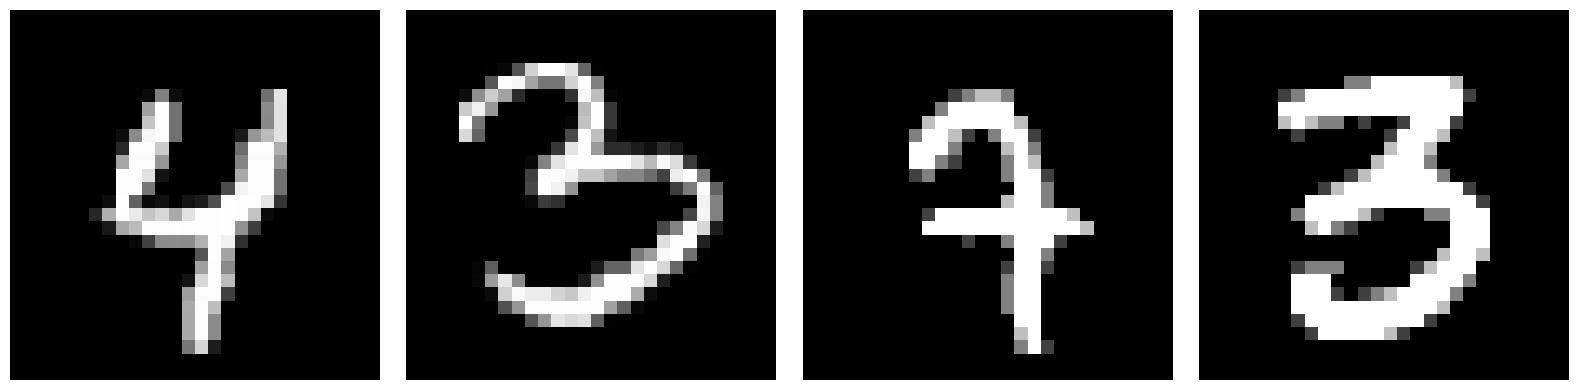

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
images = [X_test_1[1111], X_test_1[2222], X_test_1[3333], X_test_1[5555]]
for ax, img in zip(axes, images):
    ax.imshow(img, cmap="gray")  
    ax.axis("off")  
plt.tight_layout()
plt.show()

uncomment below to train on 10000 data

In [ ]:

# nn = all_network( n_input_layer=input_size, n_hidden_layer=hidden_layer_size, n_output_layer=output_layer_size, hidden_weights=hidden_weights.tolist(), hidden_bias=hidden_bias, output_weights=output_weights.tolist(), output_bias=output_bias )


# epochs = 5
# learning_rate = 0.1
# batch_size = 32
# output = nn.forward_hidden_op(X_test_1[1111])
# predicted_class = np.argmax(output)
# print("Before training:", predicted_class)
# output = nn.forward_hidden_op(X_test_1[2222])
# predicted_class = np.argmax(output)
# print("Before training:", predicted_class)
# output = nn.forward_hidden_op(X_test_1[3333])
# predicted_class = np.argmax(output)
# print("Before training:", predicted_class)
# output = nn.forward_hidden_op(X_test_1[5555])
# predicted_class = np.argmax(output)
# print("Before training:", predicted_class)

# for epoch in range(epochs):
#     total_error = 0
#     for i in range(0, len(X_train), batch_size):
#         batch_X = X_train[i:i+batch_size]
#         batch_y = y_train_onehot[i:i+batch_size]
#         for input_data, target_output in zip(batch_X, batch_y):
#             nn.backPropogation(input_data.tolist(), target_output.tolist(), learning_rate)
#             total_error += nn.calculate_total_error([(input_data.tolist(), target_output.tolist())])
#     print(f"Epoch {epoch + 1}/{epochs}, Total Error: {total_error:.6f}")


# correct_predictions = 0
# for input_data, target_label in zip(X_test, y_test):
#     predicted_output = nn.forward_hidden_op(input_data.tolist())
#     predicted_class = predicted_output.index(max(predicted_output))
#     if predicted_class == target_label:
#         correct_predictions += 1


Before training: 64
Before training: 66
Before training: 65
Before training: 63
Epoch 1/5, Total Error: 4036.792085
Epoch 2/5, Total Error: 2885.090342
Epoch 3/5, Total Error: 1073.855171
Epoch 4/5, Total Error: 550.843854
Epoch 5/5, Total Error: 441.958124

Accuracy on test data: 89.19%
After training: 7
After training: 23
After training: 20
After training: 6
Actual class: 4
Actual class: 3
Actual class: 7
Actual class: 3


In [17]:

# accuracy = correct_predictions / len(X_test)
# print(f"\nAccuracy on test data: {accuracy * 100}%")
output = nn.forward_hidden_op(X_test[1111])
predicted_class = np.argmax(output)
print("After training:", predicted_class)
output = nn.forward_hidden_op(X_test[2222])
predicted_class = np.argmax(output)
print("After training:", predicted_class)
output = nn.forward_hidden_op(X_test[3333])
predicted_class = np.argmax(output)
print("After training:", predicted_class)
output = nn.forward_hidden_op(X_test[5555])
predicted_class = np.argmax(output)
print("After training:", predicted_class)



actual_class = np.argmax(y_test_onehot[1111])
print("Actual class:", actual_class)

actual_class = np.argmax(y_test_onehot[2222])
print("Actual class:", actual_class)

actual_class = np.argmax(y_test_onehot[3333])
print("Actual class:", actual_class)

actual_class = np.argmax(y_test_onehot[5555])
print("Actual class:", actual_class)
# print("after train",output)


After training: 4
After training: 3
After training: 9
After training: 3
Actual class: 4
Actual class: 3
Actual class: 7
Actual class: 3


In [ ]:
# with open("mnist_network_model_on_10000.pkl", "wb") as file:
#     pickle.dump(nn, file)


uncomment below to train on all data

In [ ]:

# # (X_train, y_train), (X_test, y_test) = mnist.load_data()
# # X_train = X_train
# # y_train = y_train
# # X_test = X_test
# # y_test = y_test
# # X_train_1 = X_train[:1000]
# # y_train_1 = y_train[:1000]
# # X_test_1 = X_test[:1000]
# # y_test_1 = y_test[:1000]

# # X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  
# # X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


# # encoder = OneHotEncoder(sparse_output=False, categories='auto')
# # y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
# # y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# # input_size = 784
# # hidden_layer_size = 64
# # output_layer_size = 10

# # hidden_weights = np.random.rand(hidden_layer_size * input_size) * 0.1
# # output_weights = np.random.rand(output_layer_size * hidden_layer_size) * 0.1
# # hidden_bias = 0.1
# # output_bias = 0.1

# nn = all_network( n_input_layer=input_size, n_hidden_layer=hidden_layer_size, n_output_layer=output_layer_size, hidden_weights=hidden_weights.tolist(), hidden_bias=hidden_bias, output_weights=output_weights.tolist(), output_bias=output_bias )


# epochs = 5
# learning_rate = 0.1
# batch_size = 32
# output = nn.forward_hidden_op(X_test[0])
# predicted_class = np.argmax(output)
# print("Before training:", predicted_class)

# for epoch in range(epochs):
#     total_error = 0
#     for i in range(0, len(X_train), batch_size):
#         batch_X = X_train[i:i+batch_size]
#         batch_y = y_train_onehot[i:i+batch_size]
#         for input_data, target_output in zip(batch_X, batch_y):
#             nn.backPropogation(input_data.tolist(), target_output.tolist(), learning_rate)
#             total_error += nn.calculate_total_error([(input_data.tolist(), target_output.tolist())])
#     print(f"Epoch {epoch + 1}/{epochs}, Total Error: {total_error:.6f}")


# correct_predictions = 0
# for input_data, target_label in zip(X_test, y_test):
#     predicted_output = nn.forward_hidden_op(input_data.tolist())
#     predicted_class = predicted_output.index(max(predicted_output))
#     if predicted_class == target_label:
#         correct_predictions += 1



Before training: 2
Epoch 1/5, Total Error: 4036.792085
Epoch 2/5, Total Error: 2885.090342
Epoch 3/5, Total Error: 1073.855171
Epoch 4/5, Total Error: 550.843854
Epoch 5/5, Total Error: 441.958124


In [13]:
with open("mnist_network_model_all.pkl", "rb") as file:
    nn = pickle.load(file)


In [18]:

# accuracy = correct_predictions / len(X_test)
# print(f"\nAccuracy on test data: {accuracy * 100}%")
output = nn.forward_hidden_op(X_test[1])
predicted_class = np.argmax(output)
print("After training:", predicted_class)
output = nn.forward_hidden_op(X_test[2])
predicted_class = np.argmax(output)
print("After training:", predicted_class)
output = nn.forward_hidden_op(X_test[3])
predicted_class = np.argmax(output)
print("After training:", predicted_class)
output = nn.forward_hidden_op(X_test[4])
predicted_class = np.argmax(output)
print("After training:", predicted_class)




actual_class = np.argmax(y_test_onehot[1])
print("Actual class:", actual_class)

actual_class = np.argmax(y_test_onehot[2])
print("Actual class:", actual_class)

actual_class = np.argmax(y_test_onehot[3])
print("Actual class:", actual_class)

actual_class = np.argmax(y_test_onehot[4])
print("Actual class:", actual_class)


After training: 2
After training: 1
After training: 0
After training: 4
Actual class: 2
Actual class: 1
Actual class: 0
Actual class: 4
